In [2]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


import json  
import mpl_toolkits
import os
import pickle
import glob
import re
import itertools
from PIL import Image
import time


from skimage import color
from skimage.feature import hog

from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog

import cv2
import argparse as ap


import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc
from keras.utils import np_utils

import xgboost as xgb
from xgboost import XGBClassifier

import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import callbacks
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from keras.optimizers import SGD


from skimage.feature import hog
from skimage import data, color, exposure
from sklearn import cross_validation



import pyimagesearch.imutils as imutils
from pyimagesearch.helpers import pyramid
from pyimagesearch.helpers import sliding_window

In [4]:
image_data = pickle.load(open("CNN-sliding-windows/image_data.pkl", "rb"))

In [5]:
image_tag = pickle.load(open("CNN-sliding-windows/image_tag.pkl","rb"))

# Gather Variables

In [6]:
X = np.asarray(image_data)
y = np.asarray(image_tag)

In [7]:
X = X/ 255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234, stratify = y, shuffle = True)

In [9]:
# output encoding
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

# Helper functions

In [10]:
def scan_image(model,image,stepSize):
    (winW, winH) = (80, 80)
    output = []
    cnn_windows = []
    cnn_coords = []
    i = 0
    for (x, y, window) in sliding_window(image, stepSize=stepSize, windowSize=(winW, winH)):
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        cnn_window = np.expand_dims(window, axis=0)
        y_pred = model.predict(cnn_window)
        y_pred_val = list(y_pred[0])[0]
        if y_pred_val == 0.0 :
            cnn_coords.append((x,y))
            cnn_windows.append(window)
        i+=1
    output.append(cnn_windows)
    output.append(cnn_coords)
    return output

In [11]:
def plot_found(cnn_coords,image):
    plt.rcParams["figure.figsize"] = (20,10)

    fig,ax = plt.subplots(1)
    ax.imshow(image)

    for i in cnn_coords:
        rect = patches.Rectangle(i,80,80,linewidth=4,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

In [12]:
scene = cv2.imread('shipsnet_data/scenes/lb_1_crop.jpg')
scene_full = cv2.imread('shipsnet_data/scenes/lb_1.jpg')
sfbay_1 = cv2.imread('shipsnet_data/scenes/sfbay_1.png')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Winning CNN from initial round

In [13]:
np.random.seed(42)

In [14]:
# network design
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(2, activation='softmax'))

In [28]:
datagen = ImageDataGenerator(
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train)

In [32]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model2.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32), shuffle=True, epochs=18,verbose=1)


Epoch 1/18
70/70 [==============================] - 18s 263ms/step - loss: 0.3084 - acc: 0.8625
Epoch 2/18
70/70 [==============================] - 19s 276ms/step - loss: 0.2768 - acc: 0.8808
Epoch 3/18
70/70 [==============================] - 20s 283ms/step - loss: 0.2715 - acc: 0.8826
Epoch 4/18
70/70 [==============================] - 21s 301ms/step - loss: 0.2110 - acc: 0.9076
Epoch 5/18
70/70 [==============================] - 20s 287ms/step - loss: 0.1945 - acc: 0.9165
Epoch 6/18
70/70 [==============================] - 19s 268ms/step - loss: 0.1918 - acc: 0.9179
Epoch 7/18
70/70 [==============================] - 18s 264ms/step - loss: 0.1974 - acc: 0.9201
Epoch 8/18
70/70 [==============================] - 18s 264ms/step - loss: 0.1803 - acc: 0.9317
Epoch 9/18
70/70 [==============================] - 18s 253ms/step - loss: 0.1678 - acc: 0.9295
Epoch 10/18
70/70 [==============================] - 18s 251ms/step - loss: 0.1606 - acc: 0.9357
Epoch 11/18
70/70 [====================

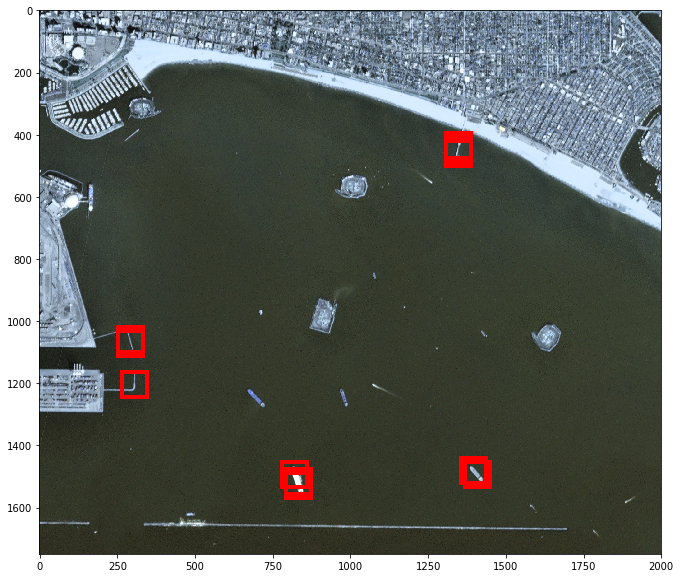

In [40]:
model2_output = scan_image(model2,scene_full,12)
plot_found(model2_output[1],scene_full)